In [1]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
import tables
import matplotlib as mpl

In [2]:
path = "/home/zelenyy/npm/phd/phd-code/cxx/thunderstorm/run/stacking_simple1.bin"

In [3]:
from phd.thunderstorm.thunderstorm_pb2 import CylinderIdList
from phd.utils.proto_list import ProtoList

In [10]:
with ProtoList(path, CylinderIdList) as protoList:
    for i in range(len(protoList.messege_sizes)):
        for item in protoList[0].cylinderId:
            print(item)

In [5]:
data

eventId: 1

In [8]:
with tables.open_file(path) as h5file:
    # print(h5file)
    for group in h5file.root:
        # print(group._v_name)
        table = h5file.get_node(group, "stacking_simple")
        # print(table.nrows)
        print(repr(table.attrs))
        # data = table.read()
        break

/sim0000/stacking_simple._v_attrs (AttributeSet), 32 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0,
    FIELD_0_NAME := 'event',
    FIELD_1_FILL := 0,
    FIELD_1_NAME := 'id',
    FIELD_2_FILL := 0,
    FIELD_2_NAME := 'parent_id',
    FIELD_3_FILL := 0,
    FIELD_3_NAME := 'particle',
    FIELD_4_FILL := 0.0,
    FIELD_4_NAME := 'energy',
    FIELD_5_FILL := 0.0,
    FIELD_5_NAME := 'theta',
    FIELD_6_FILL := 0.0,
    FIELD_6_NAME := 'radius',
    FIELD_7_FILL := 0.0,
    FIELD_7_NAME := 'z',
    FIELD_8_FILL := 0.0,
    FIELD_8_NAME := 'time',
    NROWS := 8397,
    TITLE := '',
    VERSION := '2.7',
    path := 'sim0000',
    text := '/npm/geometry/type gdml\n/npm/geometry/gdml .././gdml/0.gdml\n/npm/thunderstorm/physics standard_opt_4\n/npm/thunderstorm/minimal_energy 0.10220286877494192 MeV\n/npm/thunderstorm/stacking/electron false\n/npm/thunderstorm/stacking/positron false\n/npm/thunderstorm/stacking/gamma false\n/npm/thunderstorm/stacking/save_gamma false\n/npm/th

In [ ]:
bins = np.arange(0.001, 2, 0.001)


In [4]:
@dataclass
class CEData:
    number : int
    energy : float
    hist : np.ndarray

def select_data(table, field, height):
    m_field = table.attrs["values_gdml_field"][0]
    m_height = table.attrs["values_gdml_height"][0]
    return np.isclose([m_field, m_height], [field, height]).all()

def get_data(path, field = 0.0, height = 0.0):
    result = []
    bins = np.arange(0.001, 2, 0.001)
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "stacking_simple")
            if select_data(table, field, height):
                data = table.read()
                energy =  table.attrs["values_macros_energy"]
                number =  table.attrs["values_macros_number"]
                hist, _ = np.histogram(data["energy"], bins=bins)
                result.append(CEData(number, energy, hist))
    return result, bins

In [9]:
ce_list, bins = get_data(path, field=0.00030000000000000003)

In [10]:
ce_list = sorted(ce_list, key=lambda x: x.energy)

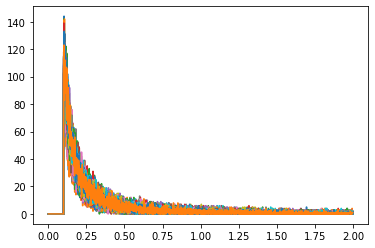

In [11]:
for item in ce_list:
    plt.step(bins[:-1], item.hist)

In [12]:
for item in ce_list:
    print(item.hist.sum()/item.number, ce_list.index(item))

79.86 0
68.07 1
89.99 2
100.51 3
96.18 4
98.94 5
88.9 6
101.45 7
106.35 8
103.53 9
107.26 10
101.54 11
106.77 12
114.34 13
107.86 14
114.07 15
109.81 16
115.8 17
106.98 18
111.38 19
116.74 20
114.67 21
115.76 22
114.34 23
114.95 24
117.02 25
113.99 26
111.22 27
116.27 28
120.65 29
120.5 30
117.07 31
117.5 32
119.6 33
116.36 34
117.33 35
118.43 36
115.26 37
117.67 38
116.91 39
118.5 40
119.42 41
118.51 42
120.45 43
118.5 44
120.67 45
119.03 46
116.21 47
117.93 48
116.74 49
119.45 50
119.29 51
117.85 52
114.88 53
118.65 54
115.35 55
116.93 56
118.76 57
115.05 58
119.03 59
119.02 60
117.2 61


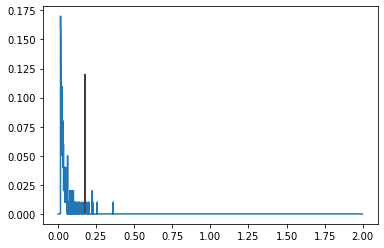

In [65]:
item = ce_list[-1]
n = 100
plt.step(bins[:-1], item.hist/item.number)
plt.vlines(item.energy, 0, 0.12)

In [3]:
def get_data_event(path, field = 0.0, height = 0.0):
    result = []
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "stacking_simple")
            if select_data(table, field, height):
                data = table.read()
                energy =  table.attrs["values_macros_energy"]
                number =  table.attrs["values_macros_number"]
                _, temp  = np.unique(data["event"], return_counts=True)
                result.append(CEData(number, energy, temp))
    return result

In [11]:
event_list = get_data_event(path, field=9e-4)

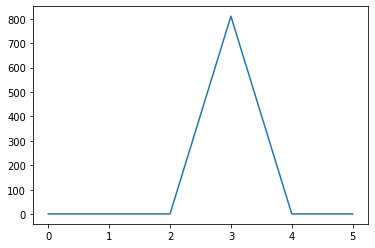

In [14]:
item = event_list[28]
plt.plot(item.hist)

In [13]:
def get_data_z(path, field = 0.0, height = 0.0):
    result = []
    bins = np.arange(-500.0, 501, 1)
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "stacking_simple")
            if select_data(table, field, height):
                data = table.read()
                energy =  table.attrs["values_macros_energy"]
                number =  table.attrs["values_macros_number"]
                temp, _ = np.histogram(data["z"], bins=bins)
                temp = np.cumsum(temp)
                result.append(CEData(number, energy, temp))
    return result

In [17]:
z_list = get_data_z(path, field=11e-4)


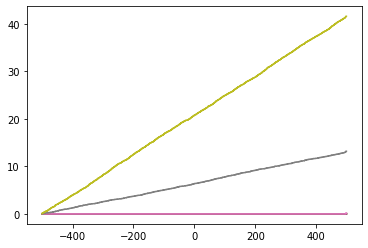

In [18]:
bins = np.arange(-500.0, 501, 1)
for item in z_list:
    plt.step(bins[:-1], item.hist/item.number)

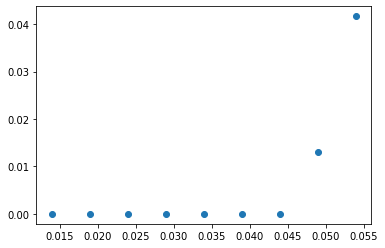

In [19]:
from scipy.linalg import lstsq

bins = np.arange(-500.0, 501, 1)
energy = []
k = []
for item in z_list:
    x = bins[:-1]
    y = item.hist/item.number
    M = x[:, np.newaxis]**[0, 1]
    p, res, rnk, s = lstsq(M, y)
    energy.append(item.energy)
    k.append(p[1])
plt.plot(energy, k, "o")

In [2]:
# path = "/mnt/storage2/phd/data/thunderstorm/critical_energy/critical_energy.npy"
path = "/mnt/storage2/phd/data/thunderstorm/critical_energy/critical_energy_up.npy"
#

In [3]:
data = np.load(path)

In [4]:
indx = np.logical_and(data["height"] == 5000.0, np.ma.masked_values(data["field"], 6.33333333e-04).mask)

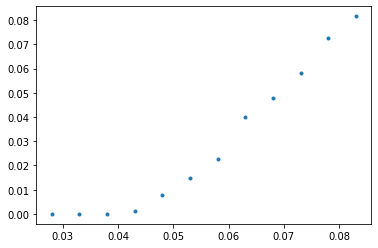

In [5]:
plt.plot(data["energy"][indx], data["k"][indx], ".")

In [7]:
x = data["energy"][indx]
y =  data["k"][indx]

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(data)

In [13]:
np.unique(data[["height","field"]])

array([(    0., 3.00000000e-04), (    0., 3.88888889e-04),
       (    0., 4.77777778e-04), (    0., 5.66666667e-04),
       (    0., 6.55555556e-04), (    0., 7.44444444e-04),
       (    0., 8.33333333e-04), (    0., 9.22222222e-04),
       (    0., 1.01111111e-03), (    0., 1.10000000e-03),
       ( 1000., 2.00000000e-04), ( 1000., 2.88888889e-04),
       ( 1000., 3.77777778e-04), ( 1000., 4.66666667e-04),
       ( 1000., 5.55555556e-04), ( 1000., 6.44444444e-04),
       ( 1000., 7.33333333e-04), ( 1000., 8.22222222e-04),
       ( 1000., 9.11111111e-04), ( 1000., 1.00000000e-03),
       ( 2000., 2.00000000e-04), ( 2000., 2.77777778e-04),
       ( 2000., 3.55555556e-04), ( 2000., 4.33333333e-04),
       ( 2000., 5.11111111e-04), ( 2000., 5.88888889e-04),
       ( 2000., 6.66666667e-04), ( 2000., 7.44444444e-04),
       ( 2000., 8.22222222e-04), ( 2000., 9.00000000e-04),
       ( 3000., 2.00000000e-04), ( 3000., 2.77777778e-04),
       ( 3000., 3.55555556e-04), ( 3000., 4.33333333e-04

In [6]:
def get_data(data):
    result = []
    fh = np.unique(data[["height", "field"]], axis=0)
    for item in fh:
        height, field = item
        indx = np.logical_and(data["height"] == height, data["field"] == field)
        x = data["energy"][indx]
        y =  data["k"][indx]
        indx = (y > 0.001).argmax()
        result.append((height, field, x[indx]))
    return result, fh


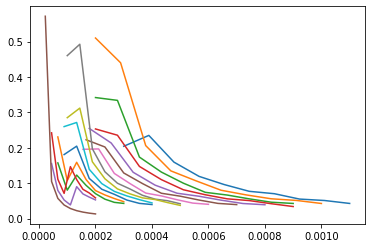

In [7]:
result, fh = get_data(data)
data_scatter = np.array(result)
heights = np.unique(fh["height"])
for height in heights:
    indx = data_scatter[:, 0] == height
    x = data_scatter[indx, 1]
    y = data_scatter[indx, 2]
    plt.plot(x,y)

0.0 0.00030000000000000003
0.0 0.0003888888888888889
0.0 0.0004777777777777778
0.0 0.0005666666666666666
0.0 0.0006555555555555556
0.0 0.0007444444444444445
0.0 0.0008333333333333333
0.0 0.0009222222222222222
0.0 0.001011111111111111
0.0 0.0011
1000.0 0.0002888888888888889
1000.0 0.00037777777777777777
1000.0 0.0004666666666666666
1000.0 0.0005555555555555556
1000.0 0.0006444444444444444
1000.0 0.0007333333333333333
1000.0 0.0008222222222222222
1000.0 0.0009111111111111111
1000.0 0.001
2000.0 0.0002777777777777778
2000.0 0.00035555555555555557
2000.0 0.0004333333333333334
2000.0 0.0005111111111111111
2000.0 0.0005888888888888889
2000.0 0.0006666666666666668
2000.0 0.0007444444444444445
2000.0 0.0008222222222222222
2000.0 0.0009000000000000001
3000.0 0.0002
3000.0 0.0002777777777777778
3000.0 0.00035555555555555557
3000.0 0.0004333333333333334
3000.0 0.0005111111111111111
3000.0 0.0005888888888888889
3000.0 0.0006666666666666668
3000.0 0.0007444444444444445
3000.0 0.0008222222222222222


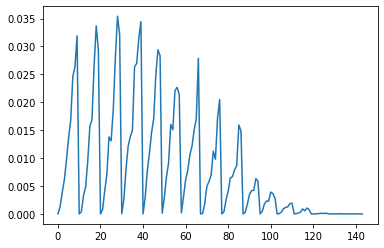

In [8]:
k_based = []
for item in fh:
    height, field = item
    indx = np.logical_and(data["height"] == height, data["field"] == field)
    x = data["energy"][indx]
    y =  data["k"][indx]

    ce = x.min()*2
    indx_x = np.argsort(x)
    x = x[indx_x]
    y = y[indx_x]
    k = y[np.ma.masked_greater_equal(x, ce).mask][0]
    k_based.append(k)
    if k!=0.0:
        print(height, field)
plt.plot(k_based)

# Минимальное поле для убегания

In [6]:
path = "/home/zelenyy/data/thunderstorm/test/result.hdf5"

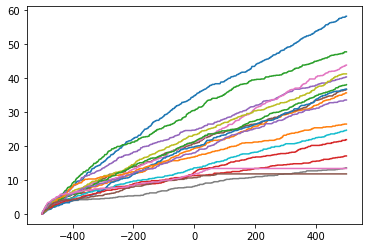

In [10]:
bins = np.arange(-500.0, 501, 1)
with tables.open_file(path) as h5file:
    # print(h5file)
    for group in h5file.root:
        # print(group._v_name)
        table = h5file.get_node(group, "stacking_simple")
        data = table.read()
        m_field = table.attrs["values_gdml_field"][0]
        m_height = table.attrs["values_gdml_height"][0]
        number =  table.attrs["values_macros_number"]
        temp, _ = np.histogram(data["z"], bins=bins)
        temp = np.cumsum(temp[::-1])/number

        plt.plot(bins[:-1], temp)

In [12]:
bins = np.arange(-500.0, 501, 1)
with tables.open_file(path) as h5file:
    result = []
    for group in h5file.root:
        # print(group._v_name)
        table = h5file.get_node(group, "stacking_simple")
        data = table.read()
        field = table.attrs["values_gdml_field"][0]
        height = table.attrs["values_gdml_height"][0]
        number =  table.attrs["values_macros_number"]
        ce = table.attrs["values_macros_min_energy"]
        result.append((height, field, table.nrows/number, ce))
    result.sort(key=lambda x: x[1])

for item in result:
    print(*item)

0.0 0.00020470466951619406 60.3 0.10220286877494192
0.0 0.0002108458096016799 37.7 0.10220286877494192
0.0 0.0002169869496871657 49.6 0.10220286877494192
0.0 0.00022312808977265153 17.7 0.10220286877494192
0.0 0.00022926922985813737 41.6 0.10220286877494192
0.0 0.0002354103699436232 37.9 0.10220286877494192
0.0 0.00024155151002910904 45.6 0.10220286877494192
0.0 0.00024769265011459485 13.7 0.10220286877494192
0.0 0.0002538337902000807 42.5 0.10220286877494192
0.0 0.0002599749302855665 25.8 0.10220286877494192
0.0 0.00026611607037105235 38.6 0.10220286877494192
0.0 0.0002722572104565382 27.4 0.10220286877494192
0.0 0.000278398350542024 40.6 0.10220286877494192
0.0 0.00028453949062750986 22.3 0.10220286877494192
0.0 0.0002906806307129957 34.8 0.10220286877494192
0.0 0.0002968217707984815 11.8 0.10220286877494192
0.0 0.0003029629108839673 13.4 0.0625584577292022


In [ ]:
import tables
path = "./result.hdf5"

with tables.open_file(path) as h5file:
    # result = []
    for group in h5file.root:
        table = h5file.get_node(group, "stacking_simple")
        field = table.attrs["values_gdml_field"][0]
        height = table.attrs["values_gdml_height"][0]
        nrows = table.nrows
        if nrows>0:
            print("{:.5f} {:.5f} {}".format(height, field, nrows))
